# Import libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

# Read the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sparshashekar/BCIS-5110/main/dataset/sales_prediction_dataset.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCL18,18.85,Low Fat,0.167444,Household,194.6136,OUT013,1987,High,Tier 3,Supermarket Type1,1166.4816
1,FDK15,10.80,Low Fat,0.164725,Meat,98.4042,OUT010,1998,NaN,Tier 3,Grocery Store,99.2042
2,FDQ57,NaN,Low Fat,0.048933,Snack Foods,144.4760,OUT019,1985,Small,Tier 1,Grocery Store,146.4760
3,FDF52,9.30,Low Fat,0.067055,Frozen Foods,184.2292,OUT018,2009,Medium,Tier 3,Supermarket Type2,1277.0044
4,FDO52,11.60,Regular,0.077479,Frozen Foods,170.3106,OUT018,2009,Medium,Tier 3,Supermarket Type2,4277.7650


## Understand more about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2000 non-null   object 
 1   Item_Weight                1651 non-null   float64
 2   Item_Fat_Content           2000 non-null   object 
 3   Item_Visibility            2000 non-null   float64
 4   Item_Type                  2000 non-null   object 
 5   Item_MRP                   2000 non-null   float64
 6   Outlet_Identifier          2000 non-null   object 
 7   Outlet_Establishment_Year  2000 non-null   int64  
 8   Outlet_Size                1456 non-null   object 
 9   Outlet_Location_Type       2000 non-null   object 
 10  Outlet_Type                2000 non-null   object 
 11  Item_Outlet_Sales          2000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 187.6+ KB


## Inference: 
- There are 12 columns in the dataset
- There are three different datatypes present in the dataset. They are int, float, object type,
- This sample of dataset has 2000 rows

## Percentage of missing data in the dataset

In [12]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.00
Item_Weight                  17.45
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  27.20
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

##### There are two columns having missing data. They are: "Item_weight" (17.45% of missing data), "outlet_size" (27.2% of missing data).

## Understand the missing data

In [14]:
df['Outlet_Size'].value_counts(dropna = False)

Medium    641
Small     571
NaN       544
High      244
Name: Outlet_Size, dtype: int64

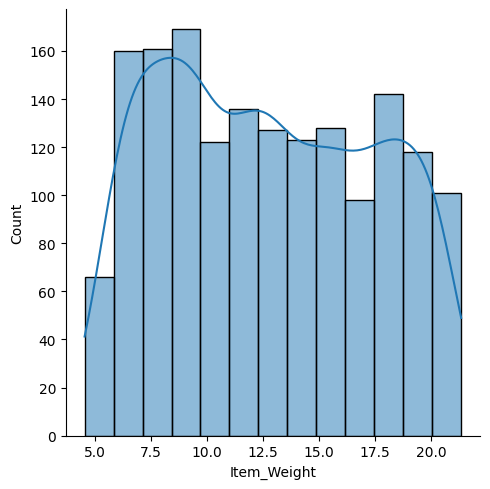

In [30]:
sns.displot(df['Item_Weight'], kde = True)

## Exploratory Data Analysis

### 1. Distribution of sales of items by Fat content

In [43]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'LF', 'low fat', 'reg'], dtype=object)

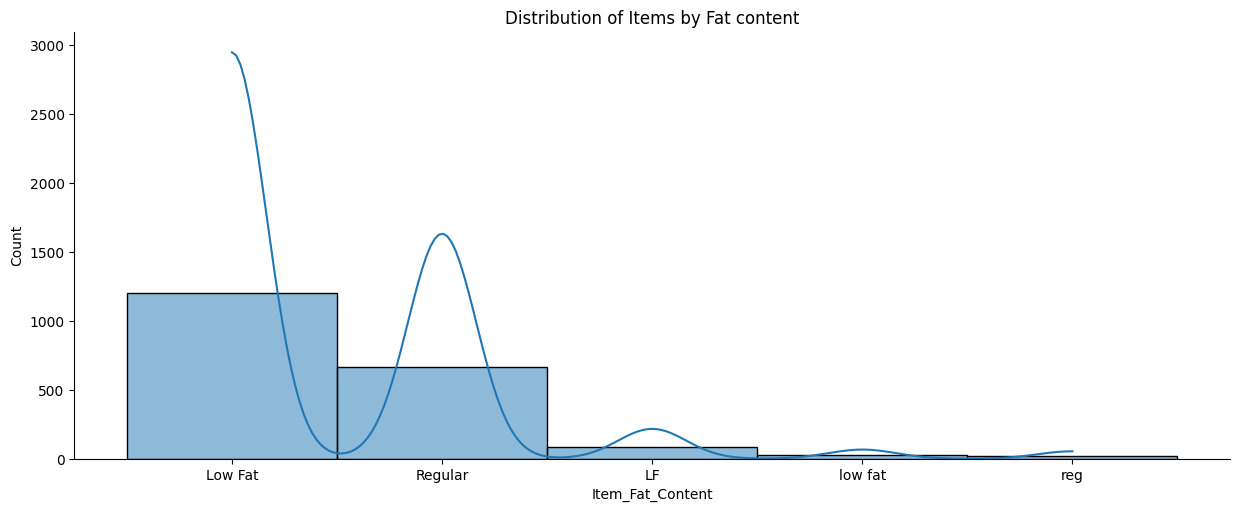

In [100]:
sns.displot(df['Item_Fat_Content'], kde = True, aspect = 2.5)
plt.title('Distribution of Items by Fat content')
plt.show()

## Inference: 
- There are more than 1000 orders that has low fat content which is the highest among the other types
- Reg fat type is the lowest among the other



### 2. Distribution of sales of items by Item Type

In [93]:
df['Item_Type'].unique()

array(['Household', 'Meat', 'Snack Foods', 'Frozen Foods',
       'Starchy Foods', 'Canned', 'Fruits and Vegetables',
       'Health and Hygiene', 'Soft Drinks', 'Baking Goods', 'Dairy',
       'Seafood', 'Breakfast', 'Others', 'Breads', 'Hard Drinks'],
      dtype=object)

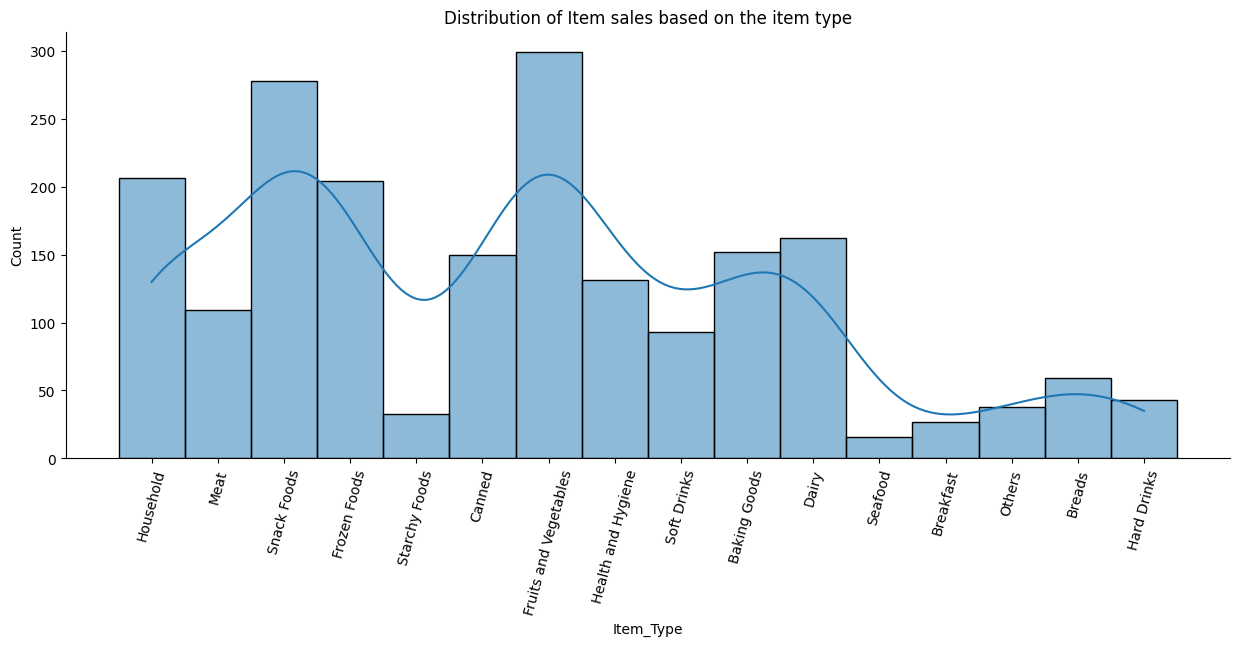

In [101]:
sns.displot(df['Item_Type'], kde = True, aspect = 2.5)
plt.title('Distribution of Item sales based on the item type')
plt.xticks(rotation = 75)
plt.show()

### 3. Describe the outlets that has most sales using a chart

In [102]:
df['Outlet_Size'].unique()

array(['High', nan, 'Small', 'Medium'], dtype=object)

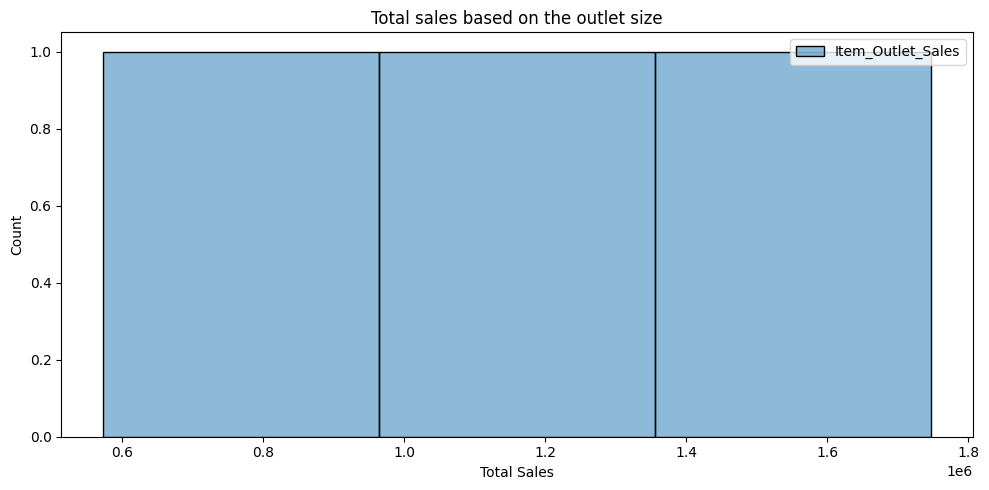

In [129]:
temp_df = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().round(2).reset_index()

plt.figure(figsize = (10, 5))
sns.histplot(temp_df)
plt.xlabel('Total Sales')
plt.title("Total sales based on the outlet size")
plt.tight_layout()
plt.show()

### 4. Visualize outlets count by its size and location type

In [135]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].count()

Outlet_Location_Type
Tier 1    567
Tier 2    215
Tier 3    674
Name: Outlet_Size, dtype: int64

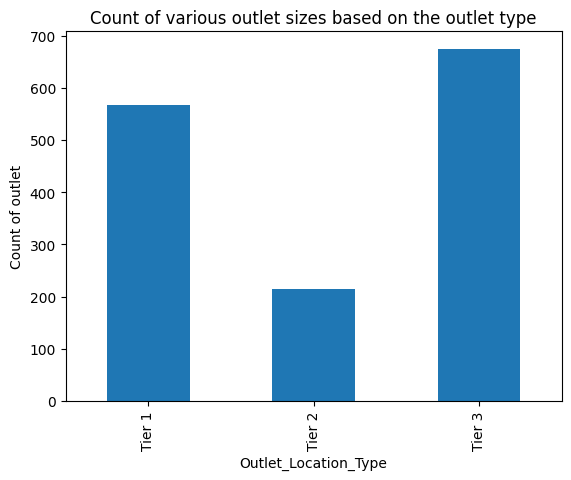

In [170]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].count().plot(kind='bar', ylabel = 'Count of outlet', title = "Count of various outlet sizes based on the outlet type")
plt.show()

### 5. Explain the relationship between the sales in outlets to their MRP

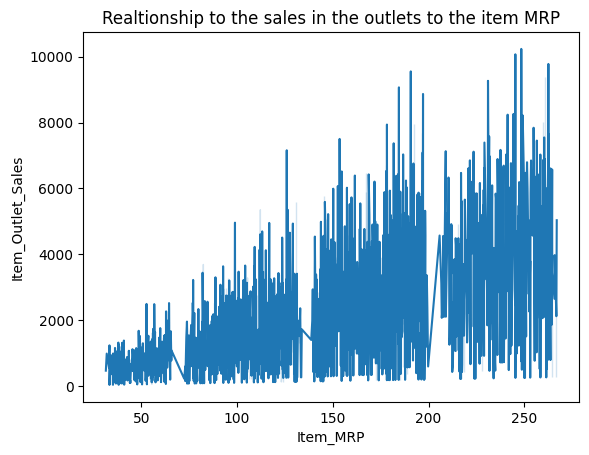

<Figure size 1500x700 with 0 Axes>

In [181]:
sns.lineplot(y = df['Item_Outlet_Sales'], x = df['Item_MRP'])
plt.title("Realtionship to the sales in the outlets to the item MRP")
plt.figure(figsize = (15, 7))
plt.show()

### 6. Understand the correlation between the independent variables to the target variable using heat map

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.022670,0.009549,-0.002060,-0.013907
Item_Visibility,-0.022670,1.000000,-0.001464,-0.061879,-0.117271
Item_MRP,0.009549,-0.001464,1.000000,-0.007121,0.573001
Outlet_Establishment_Year,-0.002060,-0.061879,-0.007121,1.000000,-0.088972
Item_Outlet_Sales,-0.013907,-0.117271,0.573001,-0.088972,1.000000


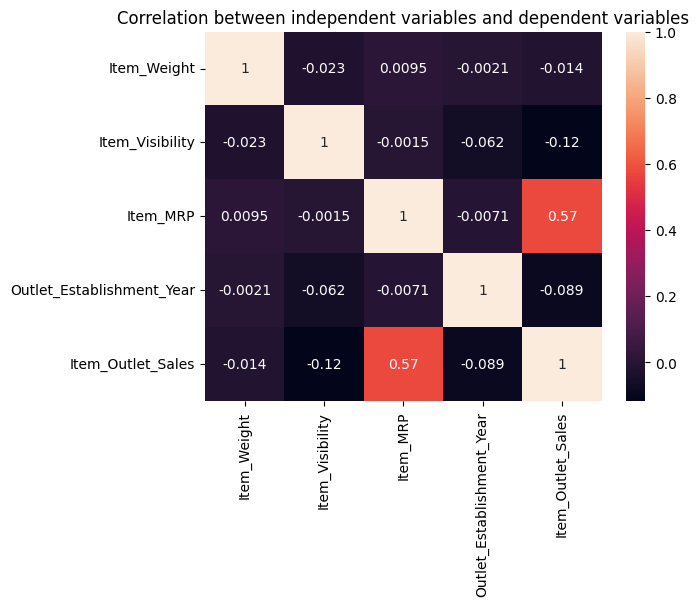

In [191]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation between independent variables and dependent variables')
plt.show()